In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

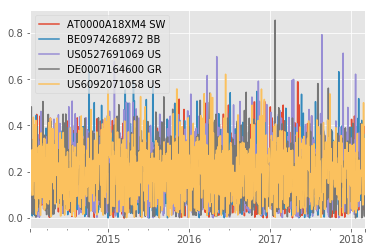

In [6]:
curr_csv = pd.read_csv('currencies.csv', sep=',', encoding='latin1')
price_csv = pd.read_csv('prices_ref.csv', sep=',', encoding='latin1', parse_dates=['date'], index_col='date')
ex_csv = pd.read_csv('exchanges_ref.csv', sep=',', encoding='latin1', parse_dates=[0], index_col=0)
weig_csv = pd.read_csv('weights_ref.csv', sep=',', encoding='latin1', parse_dates=[0], index_col=0)

weig_csv.plot()

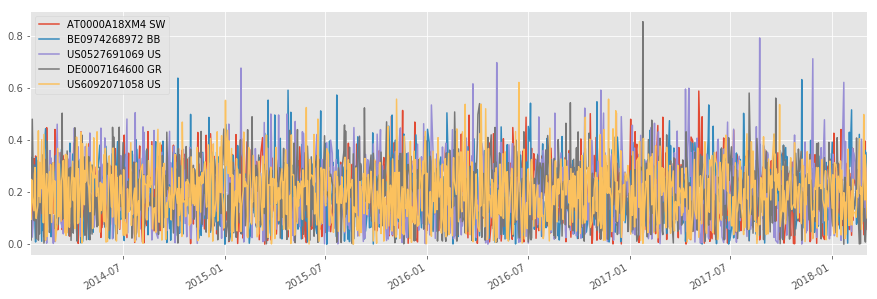

In [64]:
a = curr_csv.to_numpy()
b = price_csv.to_numpy()
weig_csv.plot()

In [95]:
class ReckTest():
    def __init__(self):
        self.result = "None"
        
    """Methods for task"""
    def calculate_asset_performance(self, start_date, end_date):
        self.result = str(start_date + end_date)
    def  calculate_currency_performance(self, start_date, end_date):
        self.result = (str(start_date) + str(end_date))
    def calculate_total_performance(self, start_date, end_date):
        self.result = str(start_date * end_date)

In [87]:
curr = ReckTest()
curr.calculate_asset_performance(1, 5)
curr.result

'6'

In [97]:
weig_csv.index

DatetimeIndex(['2014-01-14', '2014-01-15', '2014-01-16', '2014-01-17',
               '2014-01-18', '2014-01-21', '2014-01-22', '2014-01-23',
               '2014-01-24', '2014-01-25',
               ...
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
               '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
               '2018-03-03', '2018-03-06'],
              dtype='datetime64[ns]', length=1081, freq=None)